In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("Setup Complete")

Setup Complete


In [12]:
# Read the file into a variable iris_data
iris_data = pd.read_csv("D:/MaestriaEA/Analisis de Datos/Clase3/iris.csv",delimiter=";", index_col="Id")
#iris_data = pd.read_csv(iris_data, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


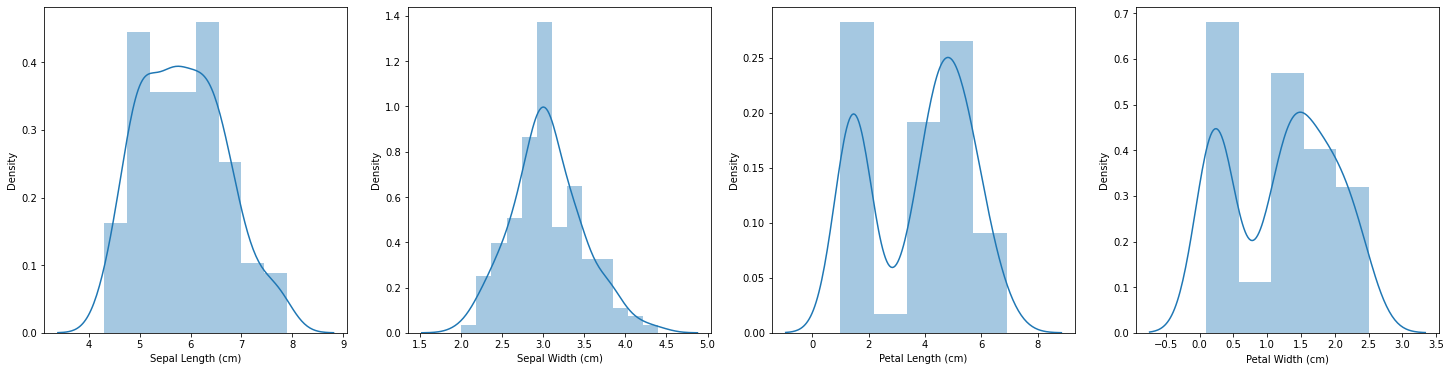

In [13]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.distplot(a=iris_data[cols[0]], hist=True)
plt.subplot(142)
sns.distplot(a=iris_data[cols[1]], hist=True)
plt.subplot(143)
sns.distplot(a=iris_data[cols[2]], hist=True)
plt.subplot(144)
sns.distplot(a=iris_data[cols[3]], hist=True, norm_hist=True)
plt.show()

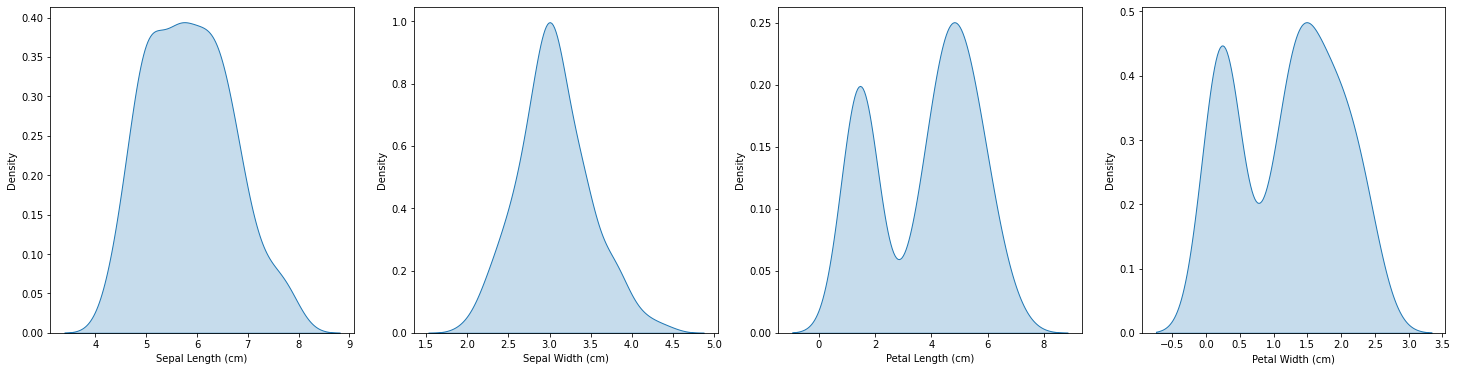

In [14]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=iris_data[cols[0]], shade=True)
plt.subplot(142)
sns.kdeplot(data=iris_data[cols[1]], shade=True)
plt.subplot(143)
sns.kdeplot(data=iris_data[cols[2]], shade=True)
plt.subplot(144)
sns.kdeplot(data=iris_data[cols[3]], shade=True)
plt.show()

<Figure size 576x432 with 0 Axes>

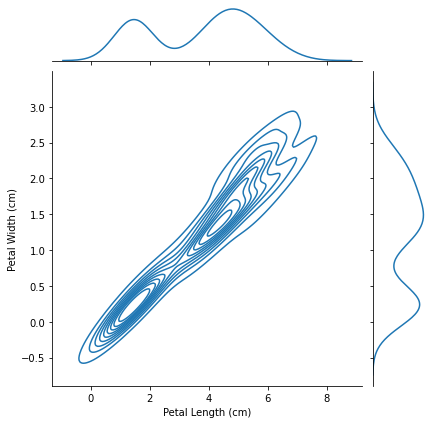

In [15]:
# 2D KDE plot
plt.figure(figsize=(8,6))
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Petal Width (cm)'], kind="kde")
plt.show()

**Color-coded plots**

Para la siguiente parte del tutorial, crearemos diagramas para comprender las diferencias entre las especies. Para lograr esto, comenzamos dividiendo el conjunto de datos en tres archivos separados, uno para cada especie.

In [16]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

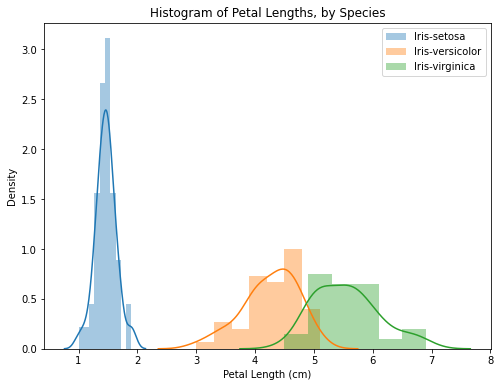

In [17]:
# Histograms for each species
plt.figure(figsize=(8,6))
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-setosa"]['Petal Length (cm)'], label="Iris-setosa", kde=True)
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-versicolor"]['Petal Length (cm)'], label="Iris-versicolor", kde=True)
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-virginica"]['Petal Length (cm)'], label="Iris-virginica", kde=True)
# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

**Encontrar la mejor distribución que se ajuste a sus datos usando la biblioteca Fitter de Python**

In [20]:
# https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
from fitter import Fitter, get_common_distributions, get_distributions

In [21]:
pl=iris_data["Petal Length (cm)"].values
pw=iris_data["Petal Width (cm)"].values
sl=iris_data["Sepal Length (cm)"].values
sw=iris_data["Sepal Width (cm)"].values
pl_se=iris_data[iris_data["Species"]=="Iris-setosa"]["Petal Length (cm)"].values
pl_ve=iris_data[iris_data["Species"]=="Iris-versicolor"]["Petal Length (cm)"].values
pl_vi=iris_data[iris_data["Species"]=="Iris-virginica"]["Petal Length (cm)"].values

In [22]:
pl_se

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [47]:
iris_data=pd.read_csv("D:/MaestriaEA/Analisis de Datos/NEW-DATA/NEW-DATA-1.T15.txt",delimiter=" ")#, 
#                      index_col="3:Temperature_Comedor_Sensor")
iris_data=iris_data.copy()
iris_data=iris_data.select_dtypes(include=["int64","float64"])
iris_data.head()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0


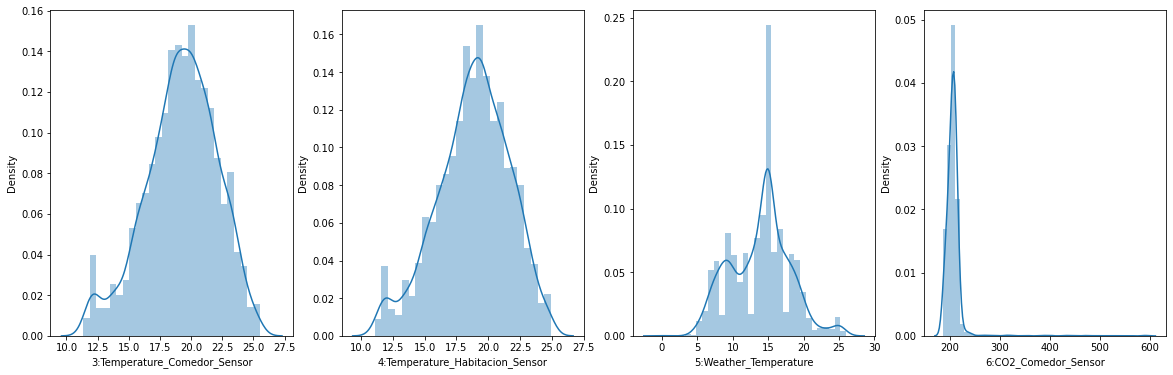

In [48]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(20,6))
plt.subplot(141)
sns.distplot(a=iris_data[cols[0]], hist=True)
plt.subplot(142)
sns.distplot(a=iris_data[cols[1]], hist=True)
plt.subplot(143)
sns.distplot(a=iris_data[cols[2]], hist=True)
plt.subplot(144)
sns.distplot(a=iris_data[cols[3]], hist=True, norm_hist=True)
plt.show()

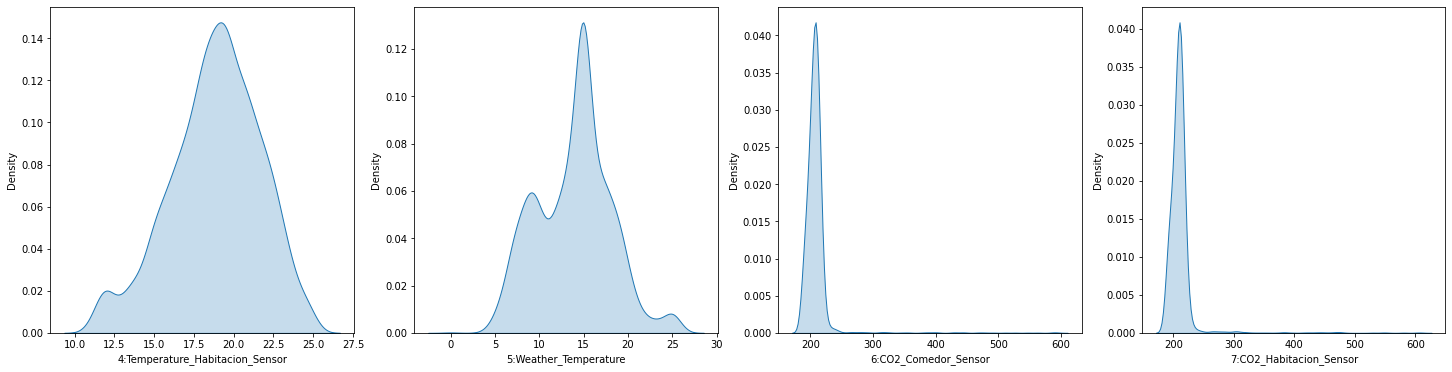

In [32]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=iris_data[cols[0]], shade=True)
plt.subplot(142)
sns.kdeplot(data=iris_data[cols[1]], shade=True)
plt.subplot(143)
sns.kdeplot(data=iris_data[cols[2]], shade=True)
plt.subplot(144)
sns.kdeplot(data=iris_data[cols[3]], shade=True)
plt.show()

In [49]:
x=iris_data['4:Temperature_Habitacion_Sensor']
y=iris_data['7:CO2_Habitacion_Sensor']

In [50]:
len(x),len(y)

(2764, 2764)

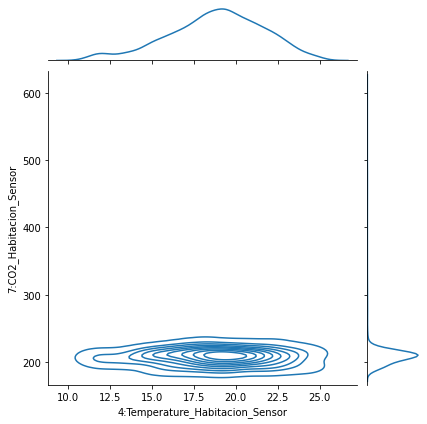

In [51]:
# 2D KDE plot
#plt.figure(figsize=(8,6))
sns.jointplot(x=x, y=y, kind="kde")
plt.show()

In [54]:
iris_data["3:Temperature_Comedor_Sensor"].value_counts()

21.3040    5
21.2320    4
18.6680    4
20.5147    4
20.0267    4
          ..
14.7087    1
14.8033    1
14.9093    1
15.0247    1
20.8560    1
Name: 3:Temperature_Comedor_Sensor, Length: 2351, dtype: int64

la Temperature Habitacion Sensor

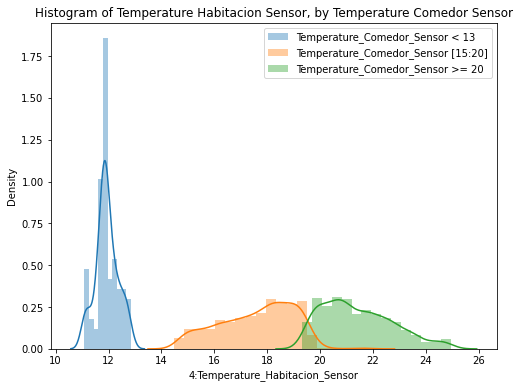

In [64]:
# Histograms for each species
plt.figure(figsize=(8,6))
sns.distplot(a=iris_data[iris_data["3:Temperature_Comedor_Sensor"]<=13]['4:Temperature_Habitacion_Sensor'], label="Temperature_Comedor_Sensor < 13", kde=True)
sns.distplot(a=iris_data[(iris_data["3:Temperature_Comedor_Sensor"]>15) & (iris_data["3:Temperature_Comedor_Sensor"]<20)]['4:Temperature_Habitacion_Sensor'], label="Temperature_Comedor_Sensor [15:20]", kde=True)
sns.distplot(a=iris_data[iris_data["3:Temperature_Comedor_Sensor"]>=20]['4:Temperature_Habitacion_Sensor'], label="Temperature_Comedor_Sensor >= 20", kde=True)
# Add title
plt.title("Histogram of Temperature Habitacion Sensor, by Temperature Comedor Sensor")

# Force legend to appear
plt.legend()

In [66]:
pl=iris_data["4:Temperature_Habitacion_Sensor"].values
pw=iris_data["5:Weather_Temperature"].values
sl=iris_data["6:CO2_Comedor_Sensor"].values
sw=iris_data["7:CO2_Habitacion_Sensor"].values
pl_se=iris_data[iris_data["3:Temperature_Comedor_Sensor"]<=13]['4:Temperature_Habitacion_Sensor']
pl_ve=iris_data[(iris_data["3:Temperature_Comedor_Sensor"]>15) & (iris_data["3:Temperature_Comedor_Sensor"]<20)]['4:Temperature_Habitacion_Sensor']
pl_vi=iris_data[iris_data["3:Temperature_Comedor_Sensor"]>=20]['4:Temperature_Habitacion_Sensor']
pl_se

700    12.8527
701    12.7967
702    12.7080
703    12.6380
704    12.5967
        ...   
852    11.7213
853    11.9413
854    12.1713
855    12.4453
856    12.7287
Name: 4:Temperature_Habitacion_Sensor, Length: 94, dtype: float64

,sumsquare_error,aic,bic,kl_div
lognorm,51.176776,167.590965,-43.522957,inf
gamma,51.179290,167.560948,-43.518338,inf
norm,51.331376,165.781495,-47.782714,inf
beta,52.935073,154.493721,-35.804314,inf
burr,53.356310,169.988178,-35.059259,inf


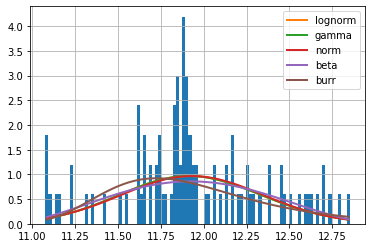

In [67]:
f = Fitter(pl_se,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

In [68]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.02816316527759625,
  'loc': -2.7230371036177248,
  'scale': 14.649660362329696}}

**Lo mejor es una Lognorm**

,sumsquare_error,aic,bic,kl_div
cauchy,44.180720,243.905612,-61.884002,inf
lognorm,51.176776,167.590965,-43.522957,inf
gamma,51.179290,167.560948,-43.518338,inf
norm,51.331376,165.781495,-47.782714,inf
exponpow,53.722520,148.831981,-38.959592,inf


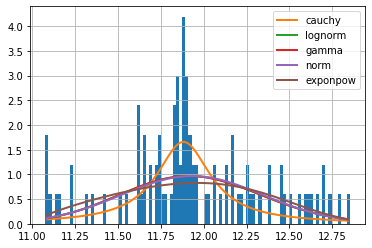

In [69]:
f = Fitter(pl_se, distributions= get_common_distributions())
f.fit()
f.summary()